In [95]:
# load packages

# core quantitative analysis packages
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt # default package
%matplotlib inline

# machine learning
#  models ordered in order of usage in the worksheet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
import xgboost # you will need to install this package, see code below to install

In [94]:
# to install a package you don't have installed (remove the hashtags below to run)

# import sys
# !{sys.executable} -m pip install xgboost

## Part 1: Preparing the dataset

In [2]:
# load the dataset (available from Moodle, need to load the data into Google Colab, see last class)

housing = pd.read_csv("Class2.csv")

In [3]:
# inspect the data

# 1. run the .head() command to see the general format of the data

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# inspect the data

# 2. run the .info() command to check size of dataset and if any missing data

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# inspect the data

# 3. run the .describe() command to get summary statistics

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Note on the data:

This is a dataset of districts of California and the housing characteristics of each district. We have the longitude and latitude of the location of the district, we have the average house age in the district, the median house price, the population of the district and the number of households that comprises. We know the total number of rooms per district as well as a subset of the total number of bedrooms. 

The median income looks strange - this is because it has been scaled. For the purposes of this analysis (and reasonably accurately) you can assume that median income is expressed in 10s of thousands. So a median value of 3.87 represents $38,700. 

Note also that there is a non-numerical column: ocean_proximity. This is likely to be an important value determinant given the excellent climate of California, so high value will surely be attached to being near the sea. We'll need to convert this variable into a quantitative variable for our analysis.

In [6]:
# check the ocean_proximity variable

housing['ocean_proximity'].value_counts()

# note the very low values for 'island' - we might want to merge this into another category in future analysis

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

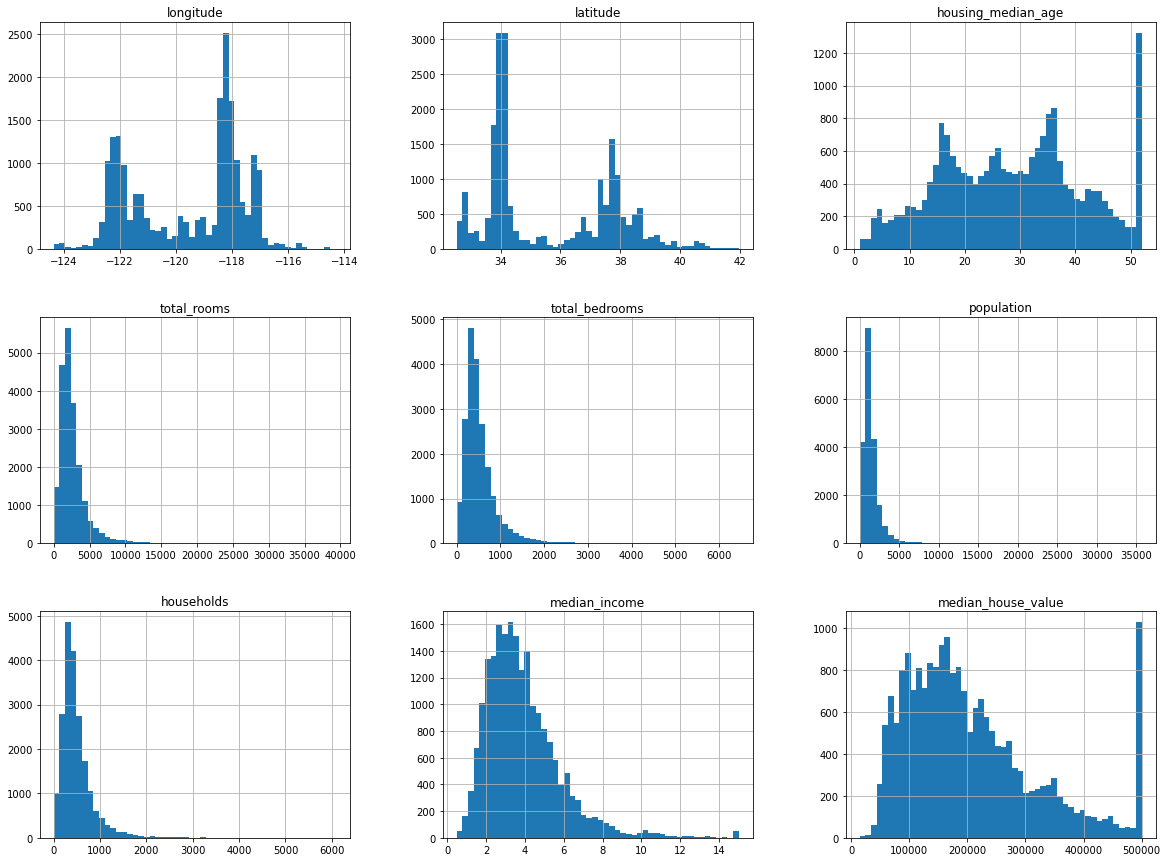

In [7]:
# visually inspect the data

housing.hist(bins=50, figsize=(20,15))


Notes on this:

The variables median_house_value and housing_median_age are clearly capped. We need to be aware of this in our testing. Practically speaking, our model might predict a house value over $500,000 (the cap level) and be judged as inaccurate, when really its because the dataset itself was capped. 

Some other data features: (1) theres a long tail to quite a few of the variables, (2) they are at very different scales, and (3) the variables sometimes lack a bell-curve style distribution (e.g. housing_median_age) which works best for linear regression models.

In [8]:
# creating a training and testing dataset

# in the first class we generated a random split between training and testing
# this is normally fine *if a random sample is likely to well-represent your overall sample*

# first create an income_cat variable so we can inspect the sample distributions
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

# then train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


# inspect the split
print(train_set['income_cat'].value_counts() / len(train_set))
print(test_set['income_cat'].value_counts() / len(test_set))

3    0.348595
2    0.317466
4    0.178537
5    0.115673
1    0.039729
Name: income_cat, dtype: float64
3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64


In [9]:
# a better train and test set split: stratified splits

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
# inspect the split
print(strat_train_set['income_cat'].value_counts() / len(strat_train_set))
print(strat_test_set['income_cat'].value_counts() / len(strat_test_set))

# although note that you need to choose the 'right' variable to split on

# we'll now remove the income_cat variable as we don't need it anymore
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64
3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

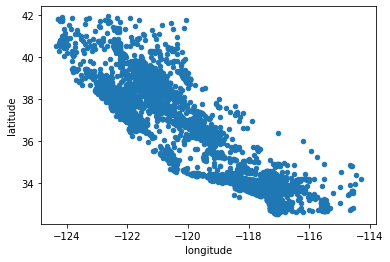

In [10]:
# further visualisation

# first, turn the training dataset into the main housing dataset, as we shouldn't be looking at the test dataset
housing = strat_train_set.copy()

# let's look at the geography of our dataset
housing.plot(kind='scatter', x='longitude', y='latitude')

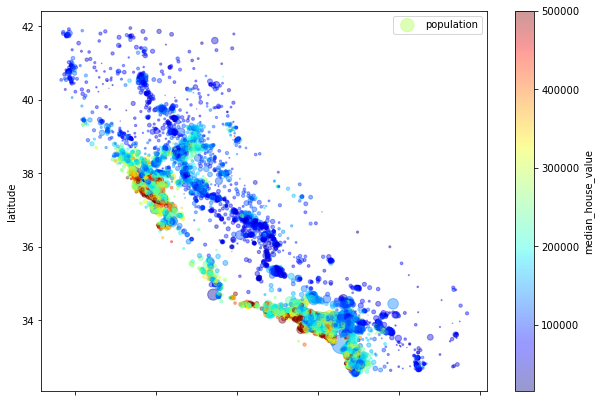

In [11]:
# improved geographical inspection: weighting by population

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [12]:
# check correlations to get a basic idea of relationships

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [13]:
# are there any new variables we can create here?

housing['rooms_per_household'] = housing['total_rooms'] / housing ['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [14]:
# we now have a decent idea of the basic relationships in our data
# let's start the formal analysis by creating a clean copy of our housing training dataset
# we'll add back in some expected relationships at a later stage

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

Note: here, I am going to manually show the individual steps needed, later in the analysis I will demonstrate how to combine these steps in a near-automated way. The combination stage is important, as it allows us to quickly transform future datasets in the same way. 

In [15]:
# first, note the missing data for total_bedrooms

housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [16]:
# 1. Handling missing data

# ideally we don't want to lose those rows of data, so we will 'impute' estimates for missing values

# set up the imputer - we normally go with a median strategy absent good information to the contrary
imputer = SimpleImputer(strategy='median')

# we need to temporarily drop ocean_proximity as it is not a numerical value
housing_num = housing.drop('ocean_proximity', axis=1)

# even though total_bedrooms is the only column with missing values, we will calculate imputed values for all columns
# this future-proofs our code in case future data has missing values for other columns
imputer.fit(housing_num)
imputer.statistics_
housing_num.median().values
print(housing_num.median().values) # check
X = imputer.transform(housing_num) # creates a matrix with all missing values transformed to imputed values
housing_tr = pd.DataFrame(X, columns=housing_num.columns, 
                          index=housing_num.index) # transforms matrix back to a dataframe

# check it has worked
housing_tr.info()

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [17]:
# 2. Handling text data in the form of categories

# first, we'll make a series of the ocean_proximity data to see how to transform it
housing_cat = housing[['ocean_proximity']]
print(housing_cat['ocean_proximity'].unique())
print(housing_cat.head(10))

['<1H OCEAN' 'NEAR OCEAN' 'INLAND' 'NEAR BAY' 'ISLAND']
      ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN


In [18]:
# we will use OneHotEncoder to turn this data into dummy category variables

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [19]:
cat_encoder.categories_

# look back to the housing_cat.head() output to confirm that coding makes sense

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [20]:
# 3. Scaling datasets
# Machine learning algorithms work best when all variables are on the same scale
# We can use the sklearn StandardScaler for this

scale = StandardScaler()
housing_scale = scale.fit_transform(housing_num) 
# we use housing_num for this example as it excludes ocean_proximity, a text variable which can't be scaled
housing_sc = pd.DataFrame(housing_scale, columns=housing_num.columns, 
                          index=housing_num.index) # transforms matrix back to a dataframe

housing_sc.describe().round(2) # check it works .describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.00,16512.00,16512.00,16512.00,16354.00,16512.00,16512.00,16512.00
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.38,-1.45,-2.20,-1.22,-1.29,-1.27,-1.32,-1.77
25%,-1.11,-0.79,-0.85,-0.55,-0.58,-0.57,-0.58,-0.69
50%,0.53,-0.65,0.03,-0.24,-0.25,-0.23,-0.24,-0.18
75%,0.78,0.97,0.66,0.24,0.26,0.27,0.28,0.46
max,2.63,2.95,1.86,17.16,13.75,30.71,12.94,5.84


In [23]:
# 4. Transformers to semi-automate workflow
# Transformers are codes that allow you to quickly transform data 
# The idea here is that you build up a collection of these over time and then can easily apply them to new datasets

# this bit is confusing. But we need to first set up some 'classes' called fit() and transform()

rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                       bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [24]:
# 5. Combine all steps together in a pipeline
# Pipelines help us ensure we are working on data transformation in the right sequential steps
# Our steps are: (1) Impute missing data, (2) Add new attributes, (3) Scale the data, (4) Transform the category text data

# Step 5.1. Divide data into numerical and text columns

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

# Step 5.2. Set up all numerical transformations

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

# Step 5.3. Add together number and text transformations

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

print(housing_prepared[:5,:])

[[-1.15604281  0.77194962  0.74333089 -0.49323393 -0.44543821 -0.63621141
  -0.42069842 -0.61493744 -0.31205452 -0.08649871  0.15531753  1.
   0.          0.          0.          0.        ]
 [-1.17602483  0.6596948  -1.1653172  -0.90896655 -1.0369278  -0.99833135
  -1.02222705  1.33645936  0.21768338 -0.03353391 -0.83628902  1.
   0.          0.          0.          0.        ]
 [ 1.18684903 -1.34218285  0.18664186 -0.31365989 -0.15334458 -0.43363936
  -0.0933178  -0.5320456  -0.46531516 -0.09240499  0.4222004   0.
   0.          0.          0.          1.        ]
 [-0.01706767  0.31357576 -0.29052016 -0.36276217 -0.39675594  0.03604096
  -0.38343559 -1.04556555 -0.07966124  0.08973561 -0.19645314  0.
   1.          0.          0.          0.        ]
 [ 0.49247384 -0.65929936 -0.92673619  1.85619316  2.41221109  2.72415407
   2.57097492 -0.44143679 -0.35783383 -0.00419445  0.2699277   1.
   0.          0.          0.          0.        ]]


## Part 2: Linear regression

In [25]:
# basic model

lr = LinearRegression()
lr.fit(housing_prepared, housing_labels)

# we have now set up the model and can apply it to predict and to check accuracy

LinearRegression()

In [26]:
# using our model to predict

predict_test_data = housing.iloc[:5]
predict_test_labels = housing_labels.iloc[:5]

predict_test_data_prep = full_pipeline.transform(predict_test_data)

print("Predicted prices: ", lr.predict(predict_test_data_prep).round(1))

print("Actual prices: ", list(predict_test_labels))

Predicted prices:  [210644.6 317768.8 210956.4  59219.  189747.6]
Actual prices:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [27]:
# intercept and betas

lr.intercept_, lr.coef_

(236914.99732815986,
 array([-55650.4116403 , -56716.45236929,  13732.83841856,  -1933.1277138 ,
          7330.04062103, -45708.26306673,  45455.47519691,  74714.39134154,
          6605.12802802,   1042.95709453,   9249.75886697, -18016.52432168,
        -55219.15208555, 110357.78363967, -22479.84008184, -14642.2671506 ]))

In [28]:
# check accuracy of our model
#  we used a package called 'accuracy_score' for logistic regression, for linear regression we use RMSE (see notes).
#  Note: for now we are just working with the training dataset, not the unseen test dataset

housing_predictions = lr.predict(housing_prepared)
lin_rmse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_rmse) # we need to get square root, as it is ROOT mean square error
lin_rmse

# results aren't great so far. A $68,628 typical prediction error on predicting house prices that have an 
# interquartile range of $120,000 to $265,000. 

68628.19819848922

In [29]:
# cross-validation scores as a better method of applying RMSE
#  a quirk of cross validation scores is that they calculate the inverse of RMSE, hence why the method we apply is
#  called negative_RMSE. We reverse this when taking the square root (notice it is minus-lin_scores)

lin_scores = cross_val_score(lr, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(lin_rmse_scores)

# the mean score is even worse than the basic model, but we can have more confidence in the score

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean:  69052.46136345083
Standard deviation:  2731.674001798347


In [30]:
# alternative estimation with gradient descent
#   see notes

sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd.fit(housing_prepared, housing_labels)

sgd_housing_predictions = sgd.predict(housing_prepared)
sgd_rmse = mean_squared_error(housing_labels, housing_predictions)
sgd_rmse = np.sqrt(sgd_rmse) 
sgd_rmse

# note: exact same answer as LinearRegression, but better algorithm for complicated linear regression analysis

68628.19819848922

In [31]:
# improving estimation with gridsearch
#    A very very basic implementation, as largely linear regression doesn't have parameters

param_grid = {"fit_intercept": [True, False] 
             }

grid_search = GridSearchCV(lr, param_grid, cv=10,
                          scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

grid_search.best_params_

# as expected the output says it is important to include an intercept
#  we'll use the gridsearch to much better effect in the next stage of analysis

{'fit_intercept': True}

In [34]:
# Decision Trees as a form of nested regression models
#   see notes

# basic decision tree model

# set up the model
dt = DecisionTreeRegressor()
dt.fit(housing_prepared, housing_labels)

# test accuracy using cross-validation scores
dt_scores = cross_val_score(dt, housing_prepared, housing_labels,
                           scoring="neg_mean_squared_error", cv=10)
dt_scores_rmse = np.sqrt(-dt_scores)
display_scores(dt_scores_rmse)

# note: at the moment the average error, $70,911, is even higher than the basic regression

Scores:  [68480.1097024  66538.28485267 71235.14733717 69488.93630443
 71092.24012237 74578.38551641 71646.23382621 71291.44509827
 76300.47062032 68466.02197375]
Mean:  70911.72753539945
Standard deviation:  2763.139150169498


In [37]:
# Random Forest regression as a collection of decision trees
#  See notes

forest = RandomForestRegressor()
forest.fit(housing_prepared, housing_labels)

housing_pred = forest.predict(housing_prepared)
housing_mse = mean_squared_error(housing_labels, housing_pred)
housing_rmse = np.sqrt(housing_mse)
print("Training dataset RMSE: ", housing_rmse)

forest_scores_cv = cross_val_score(forest, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
forest_rmse_cv = np.sqrt(-forest_scores_cv)
display_scores(forest_rmse_cv)

# This is quite computationally difficult, so might take a while to run
# Note the big reduction - almost by $20,000 - in the prediction error 

Training dataset RMSE:  18699.740222598608
Scores:  [49419.28308403 47628.5534584  49775.64674951 52251.7739635
 49812.97585181 53608.78212583 48695.10576285 48136.76347354
 52694.44669811 49823.59792911]
Mean:  50184.692909669044
Standard deviation:  1904.3251554809235


In [42]:
# let's fine-tune our model using GridSearch

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

grid_forest = GridSearchCV(forest, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_forest.fit(housing_prepared, housing_labels)

grid_forest.best_params_

{'max_features': 6, 'n_estimators': 30}

In [41]:
# check all the GridSearch results

cvres = grid_forest.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64176.10573187238 {'max_features': 2, 'n_estimators': 3}
56345.93979887553 {'max_features': 2, 'n_estimators': 10}
52660.397782716645 {'max_features': 2, 'n_estimators': 30}
59645.22601391004 {'max_features': 4, 'n_estimators': 3}
52901.8961353865 {'max_features': 4, 'n_estimators': 10}
50569.63781900424 {'max_features': 4, 'n_estimators': 30}
58440.03701432851 {'max_features': 6, 'n_estimators': 3}
51899.33578209233 {'max_features': 6, 'n_estimators': 10}
50179.56673927663 {'max_features': 6, 'n_estimators': 30}
58758.46178507249 {'max_features': 8, 'n_estimators': 3}
51947.64766890937 {'max_features': 8, 'n_estimators': 10}
50150.711305636134 {'max_features': 8, 'n_estimators': 30}
62080.158957914195 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54857.74729648174 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59666.71045876783 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52613.43993165063 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [43]:
# check what particularly works in the 'best model'

feature_importances = grid_forest.best_estimator_.feature_importances_

# lets now attach names to each of the features
# 1. Add new variables created
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
# 2. Add names to created category variables
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
# 3. Add 1 and 2 together with the already named columns
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

# we could probably refine the model further based on these results
# combine all the non-inland ocean_proximity features into 'near_sea' maybe?
# create a new combination variable of ocean_proximity plus latitude/longitude
# see what other data could be added to improve predictive power

[(0.3462446135074532, 'median_income'),
 (0.14972901189198976, 'INLAND'),
 (0.11023749712102797, 'pop_per_hhold'),
 (0.07502201324346143, 'latitude'),
 (0.07071054824796046, 'longitude'),
 (0.06648686760720304, 'rooms_per_hhold'),
 (0.05269756264798555, 'bedrooms_per_room'),
 (0.04407216808278216, 'housing_median_age'),
 (0.01883866805054079, 'total_rooms'),
 (0.017818521764855398, 'population'),
 (0.01697162733141117, 'total_bedrooms'),
 (0.016426291965905282, 'households'),
 (0.007766505999015561, '<1H OCEAN'),
 (0.00476609418901749, 'NEAR OCEAN'),
 (0.0020651879484700772, 'NEAR BAY'),
 (0.00014682040092066308, 'ISLAND')]

In [45]:
# up until now we haven't used the test dataset that we locked away at the beginning of the analysis
#  we'll now test our model on this airlocked data to check we haven't overfit

final_model = grid_forest.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47811.23512765606

In [47]:
# we might also want a confidence interval on this error estimate

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45833.03029728, 49710.78094974])

## Part 3: More advanced regression models

We'll start by considering 'constrained regression models' or 'regularised linear models' that force the final model to be as efficient as possible. Usually by reducing model features that don't add much explanatory power, through the introduction of a cost function that variables need to 'beat' to be retained in the model. We'll consider three types of these models: Ridge regression, Lasso regression, and Elastic Net regressions. Normally we would just pick one of these, rather than run all three, as they are similar in intent and (usually) outcome. Ridge is the default method that is normally used.

In [56]:
# 1. Ridge regression

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(housing_prepared, housing_labels)

ridge_pred = ridge_reg.predict(housing_prepared)
ridge_mse = mean_squared_error(housing_labels, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

68656.7704108737

In [83]:
ridge_reg.coef_

array([-51374.69771553, -52184.51188821,  13850.92291565,  -1608.15969408,
         9578.38462497, -44104.63668681,  41415.30393652,  74683.70926912,
         6084.66127196,    872.39141797,   9030.90298957,   8571.54022817,
       -31029.25143636,   5317.20768457,   4658.86594404,  12481.63757955])

In [79]:
# 2. Lasso regression

lasso_reg = Lasso(alpha=0.1, max_iter=50000) # can increase alpha to exclude more variables e.g. try alpha=100
lasso_reg.fit(housing_prepared, housing_labels)

lasso_pred = lasso_reg.predict(housing_prepared)
lasso_mse = mean_squared_error(housing_labels, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

68628.19880858094

In [80]:
# check lasso coefficients

lasso_reg.coef_

array([-55648.71169479, -56715.02409299,  13732.79348838,  -1930.46026866,
         7328.82033903, -45707.5483243 ,  45453.35467979,  74714.05768163,
         6604.69576187,   1042.78039466,   9250.06740603,      0.        ,
       -37203.2865245 , 127548.770884  ,  -4461.56504999,   3373.77493024])

In [72]:
# reminder of variable names

attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [81]:
# 3. ElasticNet regressions

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) 
elastic_net.fit(housing_prepared, housing_labels)

elastic_pred = elastic_net.predict(housing_prepared)
elastic_mse = mean_squared_error(housing_labels, elastic_pred)
elastic_rmse = np.sqrt(elastic_mse)
elastic_rmse

69450.90466998631

In [82]:
elastic_net.coef_

# note how the variable coefficients across Ridge, Lasso, Elastic Net, are all quite different

array([-28617.13108405, -28344.90064829,  14404.72800277,   3010.68193912,
        13275.493586  , -31402.30603864,  21406.42406547,  71829.93708498,
         3762.77772543,   -404.1605159 ,   7512.34029315,  11719.14697346,
       -36909.85442698,    360.70213448,   9330.11983203,  15496.88199653])

In [89]:
# Support Vector Machine regression
#   see notes

svr = LinearSVR(epsilon=2.5) # epsilon is the determinant of width of line range
svr.fit(housing_prepared, housing_labels)

svr_pred = svr.predict(housing_prepared)
svr_mse = mean_squared_error(housing_labels, svr_pred)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

# as you see from the results, in this particular case the SVR simply doesn't work
#   this is unfortunately an issue with SVR, and the reason you would include it as *a* model but not the exclusive model

218339.15956036837

In [91]:
# Gradient Boosting
#   see notes

gboost = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0) 
gboost.fit(housing_prepared, housing_labels)

gboost_pred = gboost.predict(housing_prepared)
gboost_mse = mean_squared_error(housing_labels, gboost_pred)
gboost_rmse = np.sqrt(gboost_mse)
gboost_rmse

71277.40361064207

In [109]:
# XGBoost as an alternative form of Gradient Boosting
#   has a number of practical improvements over sklearn gradient boosting

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(housing_prepared, housing_labels)

xgb_pred = xgb_reg.predict(housing_prepared)
xgb_mse = mean_squared_error(housing_labels, xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

26920.763818847765

In [111]:
# Running XGBoost on test data
#    We use a technique called 'early_stopping' here, to prevent overtraining the model

xgb_reg.fit(housing_prepared, housing_labels,
           eval_set=[(X_test_prepared, y_test)], early_stopping_rounds=2)

xgb_pred_test = xgb_reg.predict(X_test_prepared)
xgb_mse_test = mean_squared_error(y_test, xgb_pred_test)
xgb_rmse_test = np.sqrt(xgb_mse_test)
xgb_rmse_test

# Note that our final model is not as good as the training dataset results, but better than all other estimates
# Both random forests and gradient boosting give the best overall model, which is normally the case

[0]	validation_0-rmse:171317.46403
[1]	validation_0-rmse:127368.22054
[2]	validation_0-rmse:98665.22218
[3]	validation_0-rmse:80320.37244
[4]	validation_0-rmse:68393.28586
[5]	validation_0-rmse:61730.94728
[6]	validation_0-rmse:57411.50885
[7]	validation_0-rmse:54709.64919
[8]	validation_0-rmse:52930.26455
[9]	validation_0-rmse:51777.03187
[10]	validation_0-rmse:51239.06663


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:50731.38832
[12]	validation_0-rmse:49723.07512
[13]	validation_0-rmse:49368.44314
[14]	validation_0-rmse:49239.21897
[15]	validation_0-rmse:49098.78439
[16]	validation_0-rmse:48837.33763
[17]	validation_0-rmse:48339.65861
[18]	validation_0-rmse:48197.46482
[19]	validation_0-rmse:48091.98974
[20]	validation_0-rmse:47846.13214
[21]	validation_0-rmse:47845.69027
[22]	validation_0-rmse:47533.59586
[23]	validation_0-rmse:47477.79637
[24]	validation_0-rmse:47375.32492
[25]	validation_0-rmse:47411.86972
[26]	validation_0-rmse:47368.50317
[27]	validation_0-rmse:47134.16768
[28]	validation_0-rmse:46906.50874
[29]	validation_0-rmse:46891.25087
[30]	validation_0-rmse:46805.49072
[31]	validation_0-rmse:46802.19656
[32]	validation_0-rmse:46736.62747
[33]	validation_0-rmse:46593.44329
[34]	validation_0-rmse:46624.40184
[35]	validation_0-rmse:46626.44925


46593.44331890492